# KHAI BÁO THƯ VIỆN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import TimeSeriesSplit



In [3]:
df = pd.read_csv('data-kiem-tra-2.csv')
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1
...,...,...,...,...,...,...
550033,07.11.2013,10,37,18474,199.0,1
550034,18.11.2013,10,37,18474,199.0,1
550035,24.11.2013,10,37,18484,199.0,1
550036,11.11.2013,10,37,19751,99.0,1


# THÔNG TIN VỀ DATA

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550038 entries, 0 to 550037
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      550038 non-null  object 
 1   truong_1  550038 non-null  int64  
 2   truong_2  550038 non-null  int64  
 3   truong_3  550038 non-null  int64  
 4   truong_4  550038 non-null  float64
 5   truong_5  550038 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 25.2+ MB


In [38]:
df.describe()

,truong_1,truong_2,truong_3,truong_4,truong_5
count,550038.000000,550038.000000,550038.000000,550038.000000,550038.000000
mean,6.904059,33.006940,10323.650070,682.557644,1.264864
std,1.626892,16.471457,6318.869819,1140.989924,2.017879
min,4.000000,2.000000,27.000000,0.070000,-6.000000
25%,6.000000,21.000000,4607.000000,199.000000,1.000000
50%,7.000000,31.000000,9839.000000,379.000000,1.000000
75%,8.000000,50.000000,15742.000000,749.000000,1.000000
max,10.000000,59.000000,22168.000000,59200.000000,288.000000


In [39]:
df.shape

(550038, 6)

In [40]:
df.isnull().sum()

date        0
truong_1    0
truong_2    0
truong_3    0
truong_4    0
truong_5    0
dtype: int64

In [41]:
df.columns


Index(['date', 'truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5'], dtype='object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_27640\132969258.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


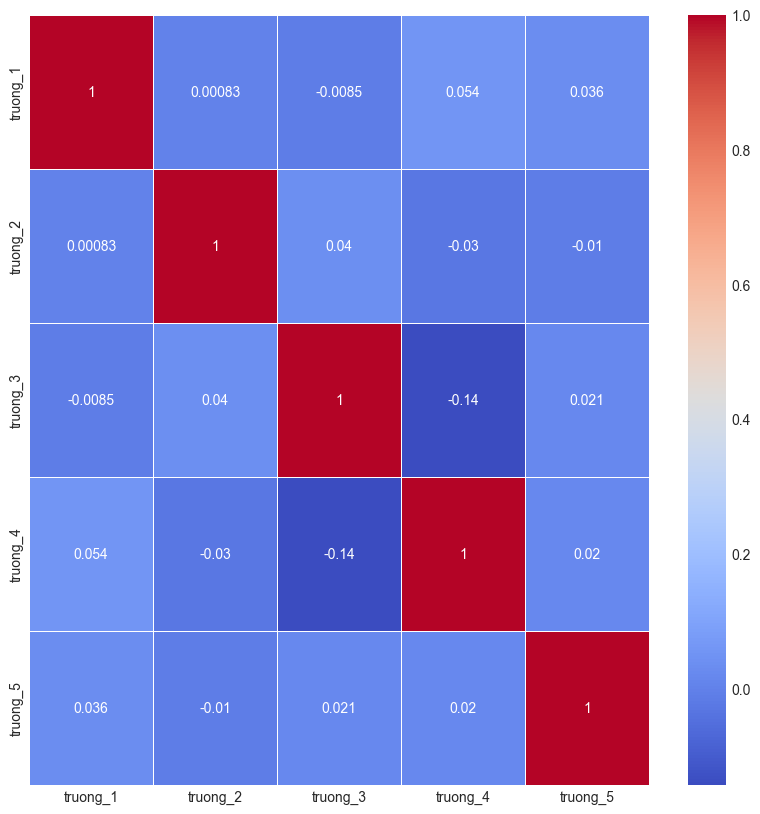

In [42]:
# heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

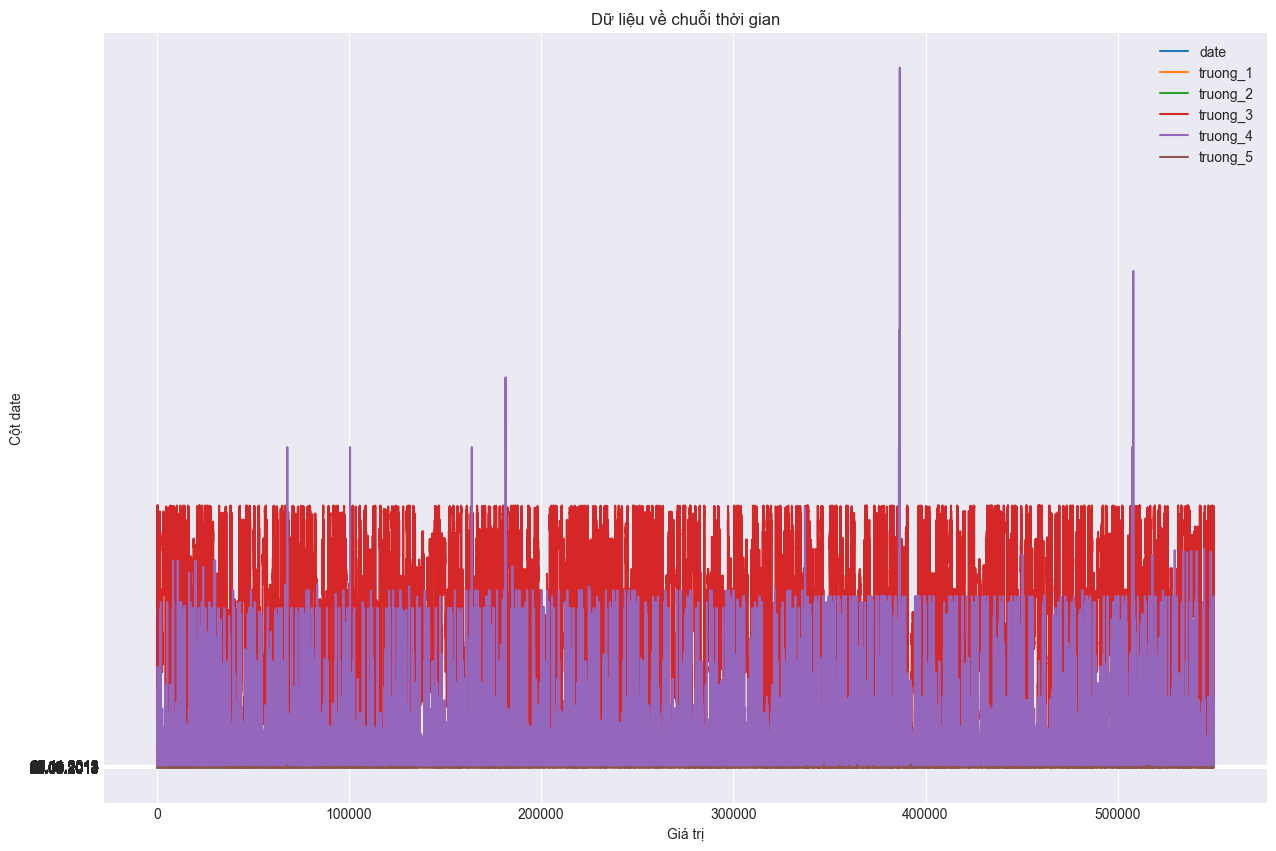

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.legend()
plt.title('Dữ liệu về chuỗi thời gian')
plt.xlabel('Giá trị')
plt.ylabel('Cột date')
plt.show()

# TIỀN XỬ LÝ DỮ LIỆU

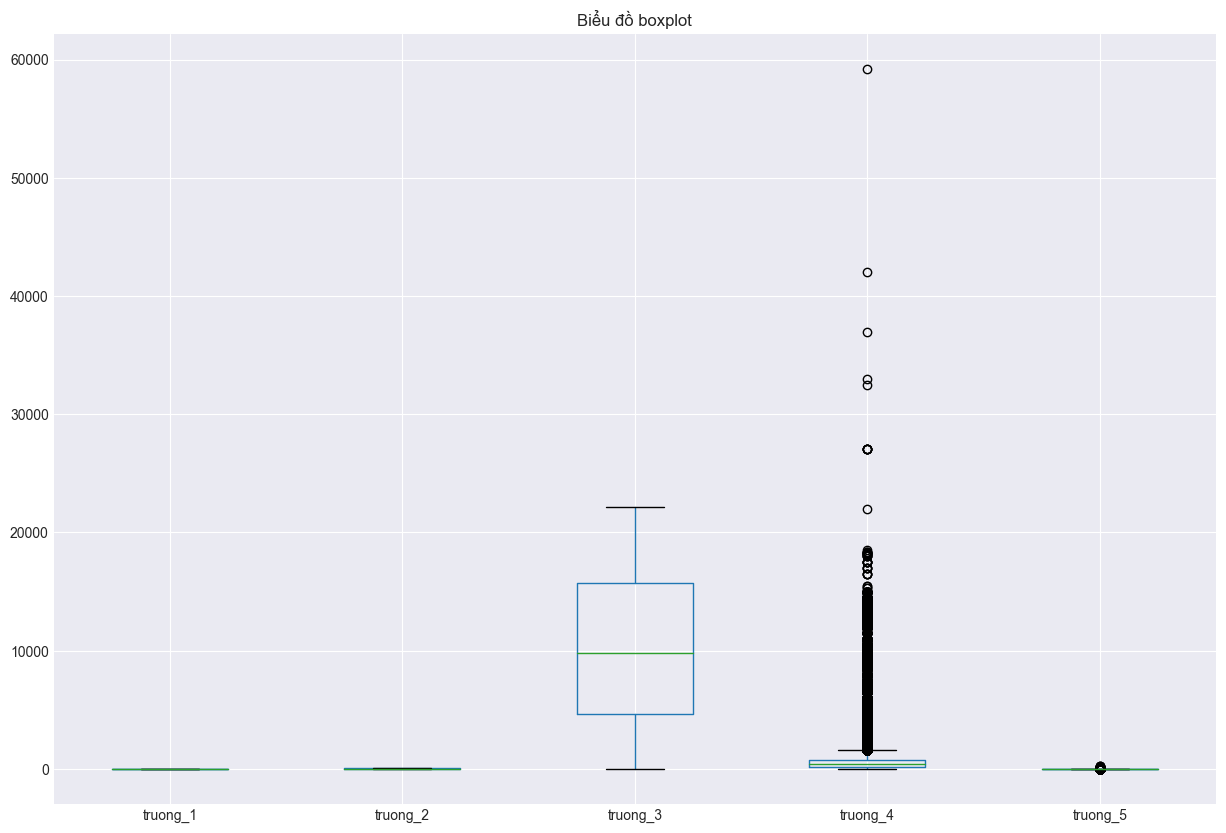

In [44]:
# Vẽ biểu đồ boxplot

plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Biểu đồ boxplot')
plt.show()



In [4]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.set_index('date', inplace=True)


### SỬ DỤNG KỸ THUẬT IQR ĐỂ XỬ LÝ CÁC OUTLIERS

In [5]:
def cap_outliers_iqr(df):
    capped_df = df.copy()
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        capped_df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        capped_df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return capped_df

data_capped = cap_outliers_iqr(df)



### ÁP DỤNG TRUNG BÌNH TRƯỢT ĐỂ GIẢM NHIỄU 

            truong_1       truong_2       truong_3       truong_4  \
count  550038.000000  550038.000000  550038.000000  550038.000000   
mean        6.904048      33.006978   10323.622538     547.449858   
std         1.626890      16.466857    6262.730342     385.658514   
min         4.000000       2.000000      28.333333       0.090000   
25%         6.000000      21.000000    4723.666667     256.666667   
50%         7.000000      31.000000    9862.166667     413.160000   
75%         8.000000      50.000000   15709.666667     740.666667   
max        10.000000      59.000000   22167.333333    1574.000000   

            truong_5  
count  550038.000000  
mean        0.995309  
std         0.057264  
min        -2.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         1.000000  


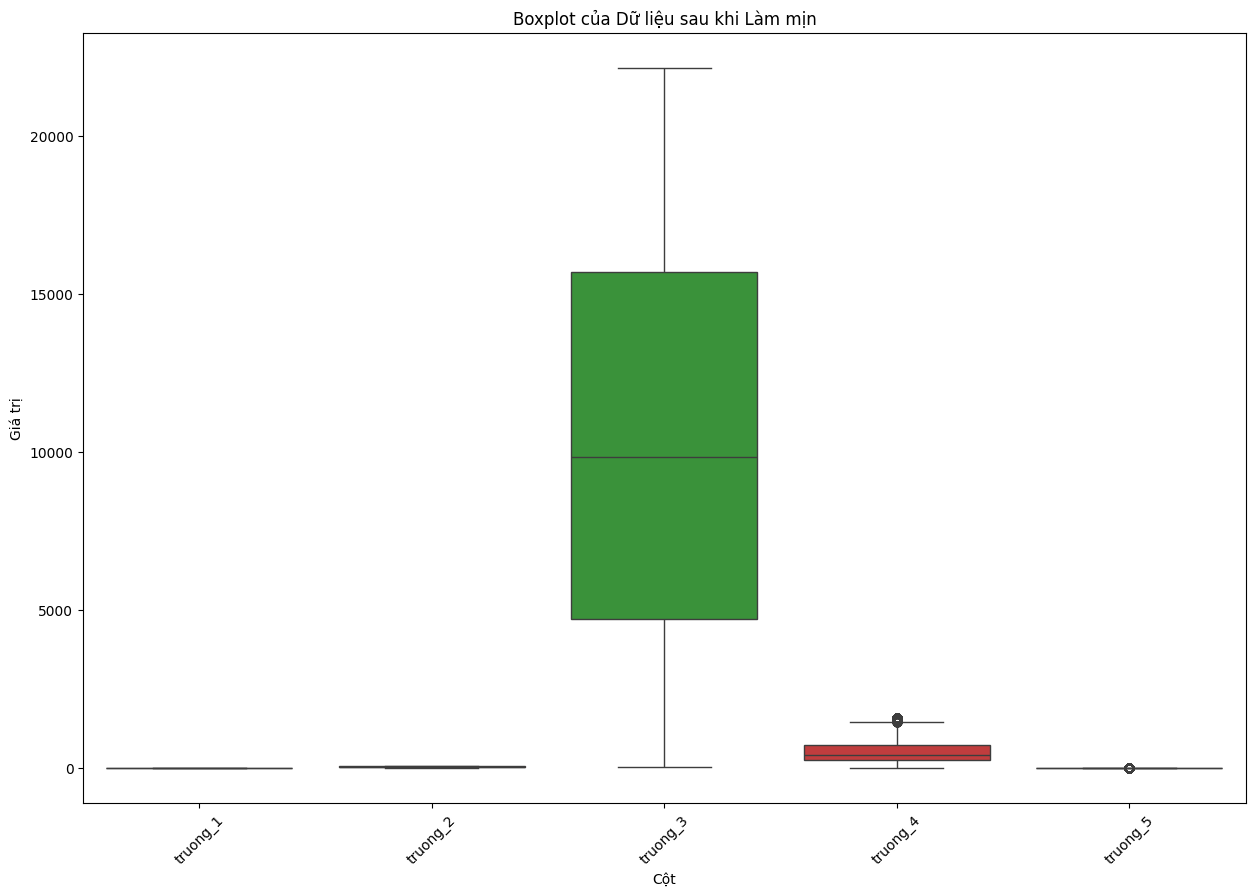

In [6]:
data_smoothed = data_capped.rolling(window=3, min_periods=1).mean()

print(data_smoothed.describe())

# Vẽ biểu đồ boxplot của dữ liệu đã làm mịn
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_smoothed)
plt.title('Boxplot của Dữ liệu sau khi Làm mịn')
plt.xlabel('Cột')
plt.ylabel('Giá trị')
plt.xticks(rotation=45)
plt.show()

# CHUẨN HÓA DỮ LIỆU DÙNG MIN-MAX SCALING


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

data_min_max_scaled = pd.DataFrame(scaler.fit_transform(data_capped), columns=df.columns, index=df.index)


In [49]:
data_min_max_scaled

,truong_1,truong_2,truong_3,truong_4,truong_5
date,,,,,
2013-05-10,0.0,0.982456,0.169188,0.189926,1.0
2013-05-26,0.0,0.982456,0.168963,0.158158,1.0
2013-05-19,0.0,0.982456,0.181067,0.266168,1.0
2013-05-25,0.0,0.982456,0.580416,0.094623,1.0
2013-05-15,0.0,0.982456,0.580733,0.093988,1.0
...,...,...,...,...,...
2013-11-07,1.0,0.614035,0.833160,0.126391,1.0
2013-11-18,1.0,0.614035,0.833160,0.126391,1.0
2013-11-24,1.0,0.614035,0.833612,0.126391,1.0


# HUẤN LUYỆN MÔ HÌNH

# ARIMAX

### CHIA DỮ LIỆU

In [52]:

# Chia dữ liệu thành phần huấn luyện và phần kiểm tra
train_size = int(len(data_min_max_scaled) * 0.8)  # 80% dữ liệu cho huấn luyện
train_data_min_max_scaled = data_min_max_scaled.iloc[:train_size]
test_data_min_max_scaled = data_min_max_scaled.iloc[train_size:]

###  TRAIN MODEL

In [56]:
train_data_min_max_scaled['date'] = train_data_min_max_scaled.index.astype(int) // 10**9
test_data_min_max_scaled['date'] = test_data_min_max_scaled.index.astype(int) // 10**9

# Huấn luyện mô hình ARIMAX
exog_train_data_min_max_scaled = train_data_min_max_scaled[['date', 'truong_1', 'truong_2', 'truong_4', 'truong_5']]
arimax_model = ARIMA(train_data_min_max_scaled['truong_3'], exog=exog_train_data_min_max_scaled, order=(1, 1, 1))
arimax_result = arimax_model.fit()


print(arimax_result.summary())


C:\Users\DELL\AppData\Local\Temp\ipykernel_27640\2695319604.py:2: FutureWarning: The behavior of .astype from datetime64[ns] to int32 is deprecated. In a future version, this astype will return exactly the specified dtype instead of int64, and will raise if that conversion overflows.
  train_data_min_max_scaled['date'] = train_data_min_max_scaled.index.astype(int) // 10**9
C:\Users\DELL\AppData\Local\Temp\ipykernel_27640\2695319604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_min_max_scaled['date'] = train_data_min_max_scaled.index.astype(int) // 10**9
C:\Users\DELL\AppData\Local\Temp\ipykernel_27640\2695319604.py:3: FutureWarning: The behavior of .astype from datetime64[ns] to int32 is deprecated. In a future version, this asty

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Dự đoán và đánh giá mô hình ARIMAX trên dữ liệu kiểm tra
print('Dự đoán và đánh giá mô hình ARIMAX trên dữ liệu kiểm tra')
exog_test_data_min_max_scaled = test_data_min_max_scaled[['date', 'truong_1', 'truong_2', 'truong_4', 'truong_5']]
arimax_forecast = arimax_result.forecast(steps=len(test_data_min_max_scaled), exog=exog_test_data_min_max_scaled)
arimax_mse = mean_squared_error(test_data_min_max_scaled['truong_3'], arimax_forecast)

arimax_mae = mean_absolute_error(test_data_min_max_scaled['truong_3'], arimax_forecast)

print("ARIMAX Mean Squared Error:", arimax_mse)
print("ARIMAX Mean Absolute Error:", arimax_mae)



Dự đoán và đánh giá mô hình ARIMAX trên dữ liệu kiểm tra


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMAX Mean Squared Error: 0.26545941846378807
ARIMAX Mean Absolute Error: 0.42698140540453045


# SARIMA

### CHIA DỮ LIỆU

In [9]:
# Chia dữ liệu thành phần huấn luyện và phần kiểm tra
train_size = int(len(data_min_max_scaled) * 0.6)  
train_data_min_max_scaled = data_min_max_scaled.iloc[:train_size]
test_data_min_max_scaled = data_min_max_scaled.iloc[train_size:]

### TRAIN MODEL

In [11]:

# Chọn cột chuỗi thời gian mục tiêu và các biến giải thích nếu có
y = train_data_min_max_scaled[['truong_3']]
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y)


# Huấn luyện mô hình SARIMA
sarima_model = SARIMAX(y_scaled, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()


print(sarima_result.summary())



MemoryError: Unable to allocate 1.79 GiB for an array with shape (27, 27, 330022) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 988, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 1.79 GiB for an array with shape (27, 27, 330022) and data type float64


AttributeError: Memoryview is not initialized